# EDA for Winter Wheat

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.stats as stats
from patsy import dmatrices
import numpy as np

--- EDA: Correlation Analysis of All Monthly Stressors ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Selected 43 monthly stressor variables for correlation analysis.

Generating correlation heatmap...


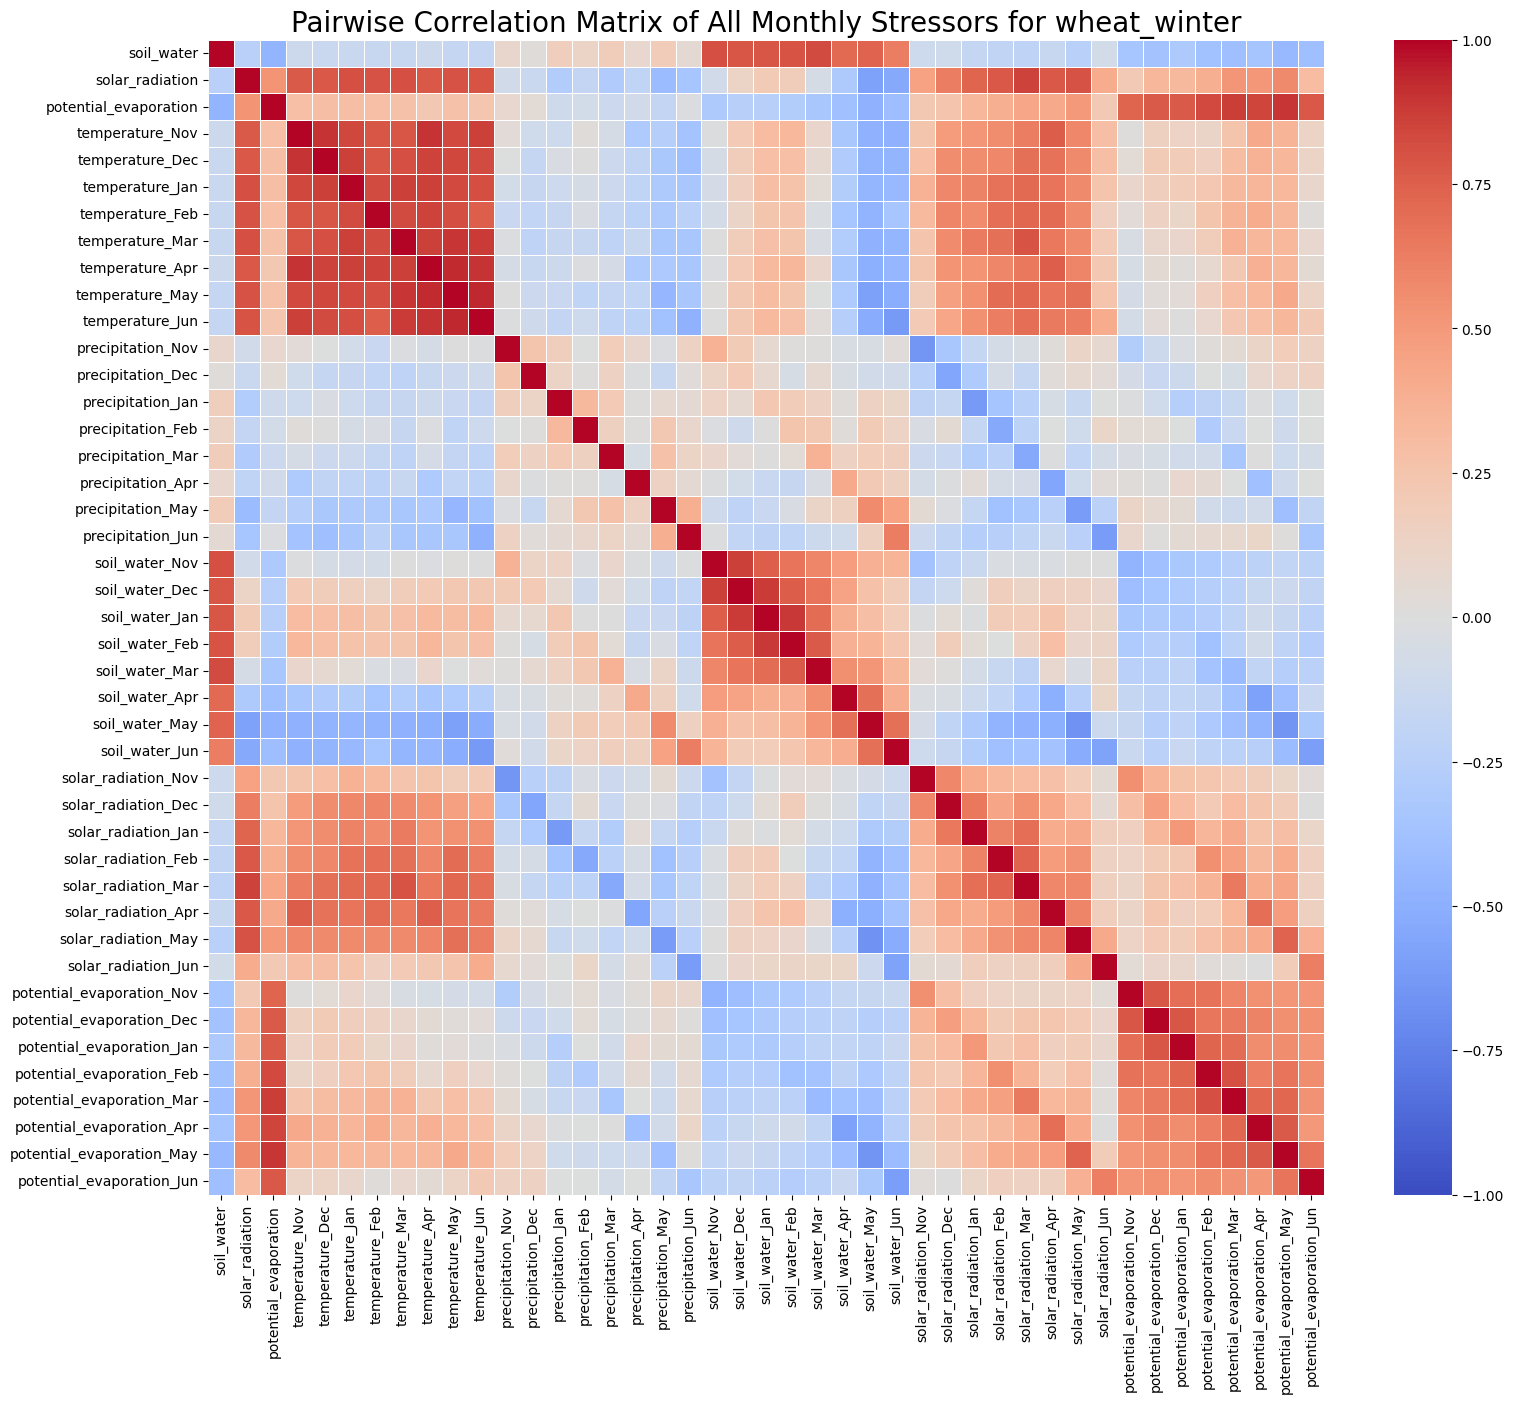

In [2]:
# Exploratory Data Analysis - Full Correlation Matrix

print("--- EDA: Correlation Analysis of All Monthly Stressors ---")

# --- 1. Load the Data ---
# As confirmed, this file is already specific to wheat_winter and its growing season.
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Select Only the Monthly Stressor Variables ---
    # We will select all columns that have a month name in them, which is a robust
    # way to grab all the monthly predictors we want to investigate.
    monthly_stressors = [col for col in df_wheat_winter.columns if '_' in col and 'yield' not in col]
    df_corr = df_wheat_winter[monthly_stressors]
    
    print(f"\nSelected {len(df_corr.columns)} monthly stressor variables for correlation analysis.")

    # --- 3. Calculate and Print the Correlation Matrix ---
    correlation_matrix = df_corr.corr()
    
    # Optional: If you want to see the full numerical matrix, uncomment the next line
    # print("\n--- Full Pairwise Correlation Matrix ---")
    # print(correlation_matrix)

    # --- 4. Visualize the Matrix with a Heatmap ---
    # A heatmap is the best way to see the broad patterns of collinearity.
    print("\nGenerating correlation heatmap...")
    
    plt.figure(figsize=(18, 15))
    heatmap = sns.heatmap(
        correlation_matrix,
        cmap='coolwarm',  # Use a diverging colormap (red=positive, blue=negative)
        center=0,         # Center the colormap at zero
        vmin=-1,          # Set the color scale limits to the theoretical min/max
        vmax=1,
        linewidths=.5,
        annot=False       # Annotations are turned off as the matrix is too large to be readable
    )
    
    plt.title('Pairwise Correlation Matrix of All Monthly Stressors for wheat_winter', fontsize=20)
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Extended EDA for wheat_winter Yield Analysis ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Task 1: Analyzing the distribution of the dependent variable 'yield_wheat_winter' ---


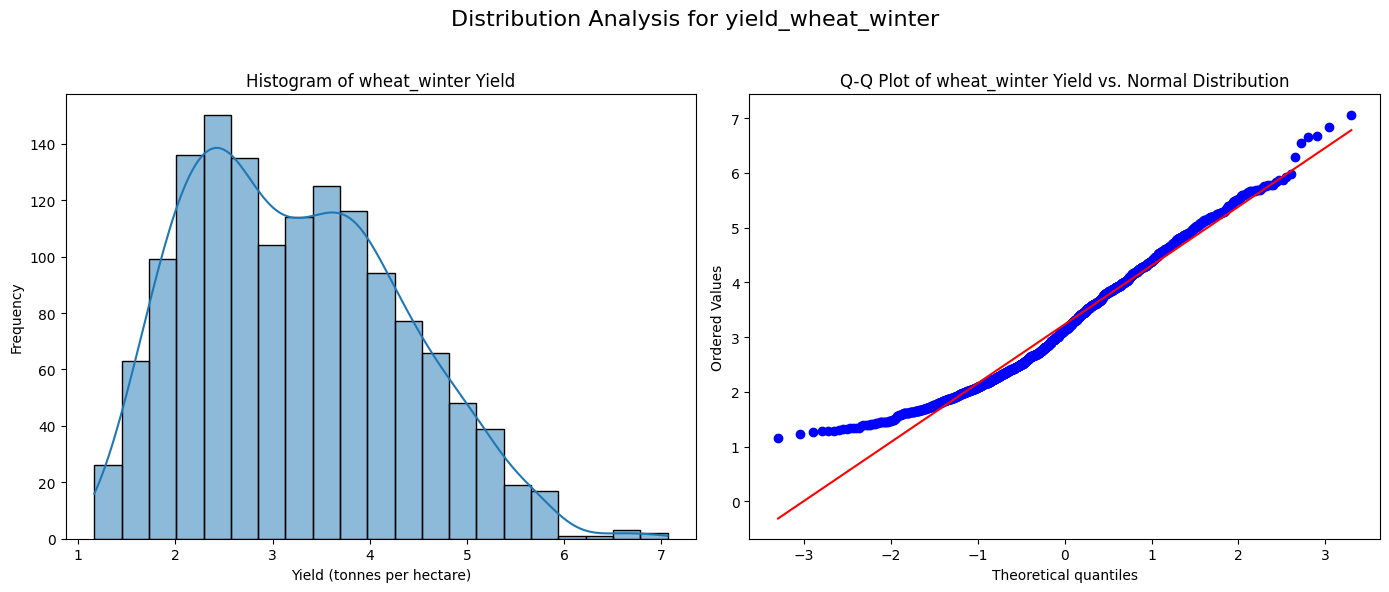

Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.

--- Task 2: Visualizing relationships between yield and key climate stressors ---


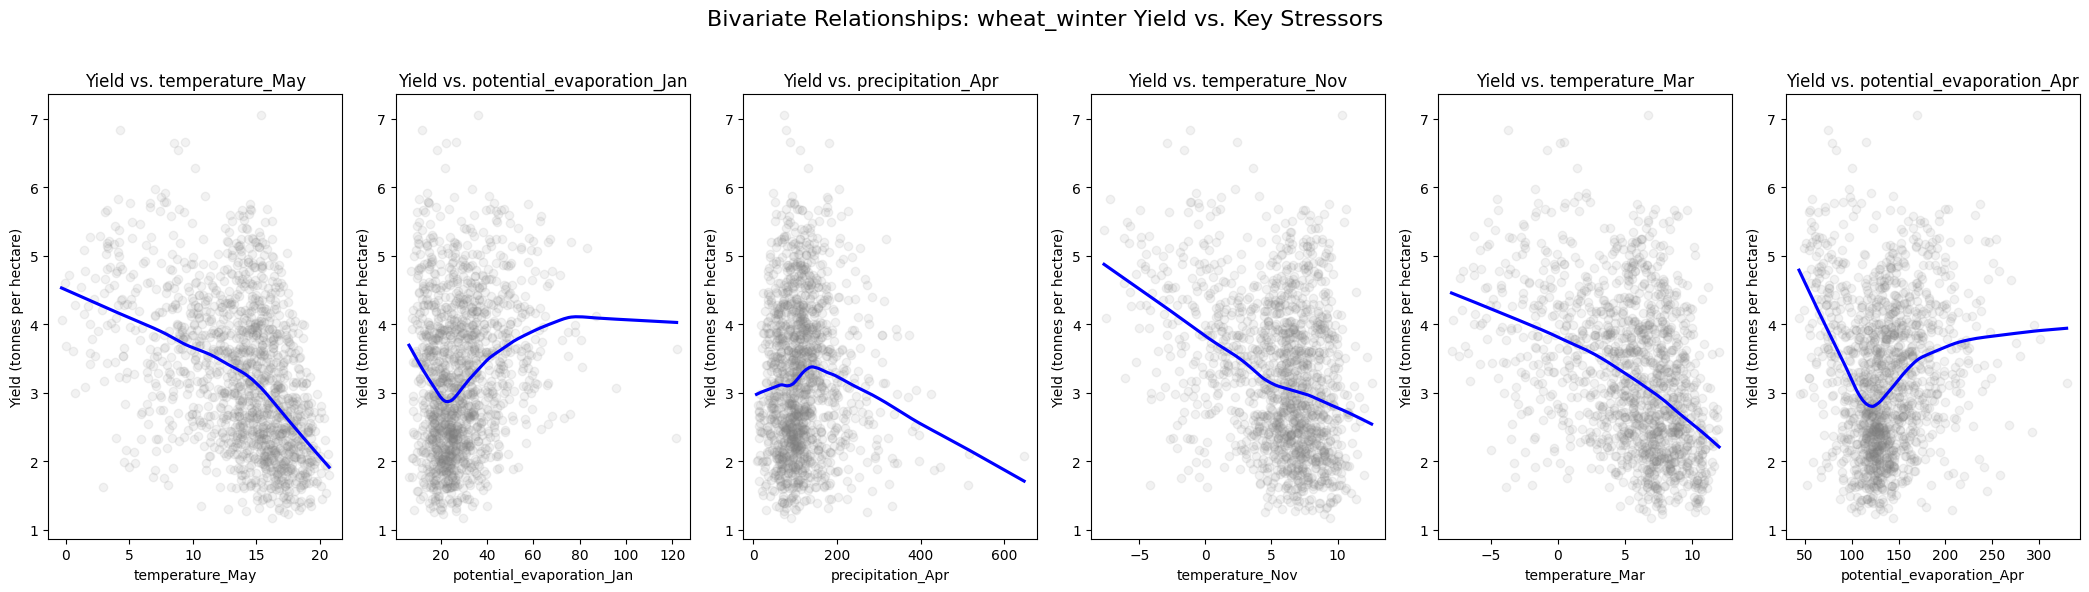

Scatter plots generated. Look for non-linear patterns that might inform our final model.

--- Task 3: Examining long-term trends in yield and a key climate variable ---


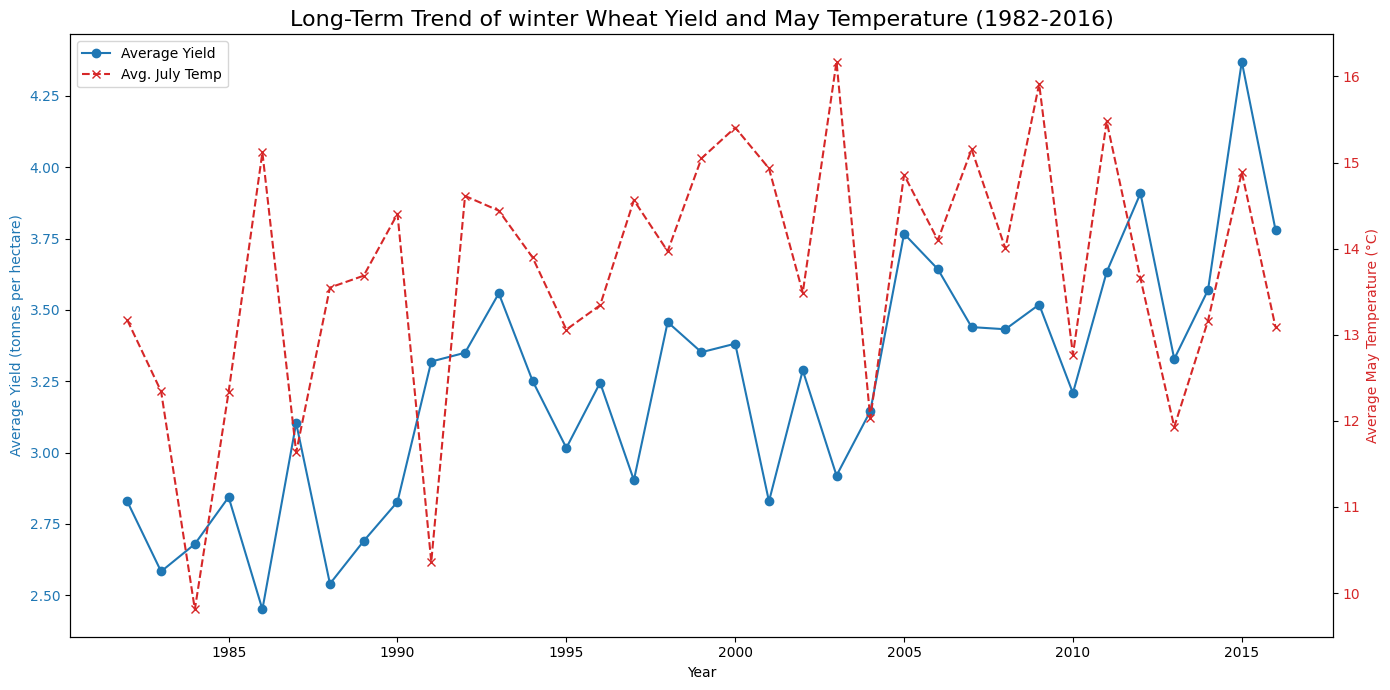

Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.



In [3]:
print("--- Extended EDA for wheat_winter Yield Analysis ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- Task 1: Examine the Distribution of the Dependent Variable (yield_wheat_winter) ---
    print("--- Task 1: Analyzing the distribution of the dependent variable 'yield_wheat_winter' ---")
    
    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Distribution Analysis for yield_wheat_winter', fontsize=16)

    # a) Histogram with a Kernel Density Estimate (KDE)
    # This helps us visually assess the shape, center, and spread of the yield data.
    # We are checking for positive skewness, which is characteristic of data modeled by a Gamma distribution.
    sns.histplot(df_wheat_winter['yield_wheat_winter'], kde=True, ax=axes[0])
    axes[0].set_title('Histogram of wheat_winter Yield')
    axes[0].set_xlabel('Yield (tonnes per hectare)')
    axes[0].set_ylabel('Frequency')

    # b) Q-Q (Quantile-Quantile) Plot against a theoretical normal distribution
    # This plot helps us assess if the data's distribution follows a specific theoretical distribution.
    # Deviations from the red line suggest skewness or heavy tails.
    # While our target is a Gamma GLM, a Q-Q plot vs. Normal is a standard first step to detect non-normality.
    stats.probplot(df_wheat_winter['yield_wheat_winter'], dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot of wheat_winter Yield vs. Normal Distribution')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.\n")


    # --- Task 2: Bivariate Scatter Plots of Yield vs. Key Stressors ---
    print("--- Task 2: Visualizing relationships between yield and key climate stressors ---")
    
    # Select a few key stressors based on agronomic theory for wheat_winter
    key_stressors = ['temperature_May','potential_evaporation_Jan','precipitation_Apr','temperature_Nov','temperature_Mar','potential_evaporation_Apr']
    
    # Create a figure to hold the scatter plots
    fig, axes = plt.subplots(1, len(key_stressors), figsize=(21, 6))
    fig.suptitle('Bivariate Relationships: wheat_winter Yield vs. Key Stressors', fontsize=16)

    for i, stressor in enumerate(key_stressors):
        # We use a regression plot with a LOWESS (Locally Weighted Scatterplot Smoothing) curve.
        # This is a non-parametric way to see the underlying trend without assuming a linear relationship.
        # It's excellent for spotting potential non-linearities (like an inverted 'U' shape).
        sns.regplot(
            x=stressor,
            y='yield_wheat_winter',
            data=df_wheat_winter,
            ax=axes[i],
            lowess=True, # Use LOWESS smoother to detect non-linear patterns
            scatter_kws={'alpha': 0.1, 'color': 'gray'}, # De-emphasize individual points
            line_kws={'color': 'blue'} # Emphasize the trend line
        )
        axes[i].set_title(f'Yield vs. {stressor}')
        axes[i].set_xlabel(f'{stressor}')
        axes[i].set_ylabel('Yield (tonnes per hectare)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Scatter plots generated. Look for non-linear patterns that might inform our final model.\n")


    # --- Task 3: Plot Key Variables Over Time ---
    print("--- Task 3: Examining long-term trends in yield and a key climate variable ---")
    
    # Calculate the mean of yield and a key stressor for each year
    yearly_data = df_wheat_winter.groupby('year')[['yield_wheat_winter', 'temperature_May']].mean().reset_index()

    # Create a plot with a primary and secondary y-axis to show both trends together.
    # This confirms the necessity of including 'year' as a control variable to capture trends
    # likely related to technology, while also checking for climate trends.
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting average yield on the primary (left) y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Yield (tonnes per hectare)', color=color)
    ax1.plot(yearly_data['year'], yearly_data['yield_wheat_winter'], color=color, marker='o', label='Average Yield')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    
    # Plotting average temperature on the secondary (right) y-axis
    color = 'tab:red'
    ax2.set_ylabel('Average May Temperature (°C)', color=color)
    ax2.plot(yearly_data['year'], yearly_data['temperature_May'], color=color, linestyle='--', marker='x', label='Avg. July Temp')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Long-Term Trend of winter Wheat Yield and May Temperature (1982-2016)', fontsize=16)
    fig.tight_layout()
    # Adding a single legend for both lines
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.show()
    print("Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.\n")


except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except KeyError as e:
    print(f"ERROR: A required column was not found in the dataset: {e}. Please check the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# regularization

In [4]:
# --- 1. Load the Data ---
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Define the Full Model Formula ---
    # Programmatically get all monthly stressor column names
    monthly_stressors = [col for col in df_wheat_winter.columns if '_' in col and 'yield' not in col]
    
    # Join them with '+' to create the predictor part of the formula
    stressor_formula_part = ' + '.join(monthly_stressors)
    
    # Construct the complete R-style formula string.
    # We include our controls (year, spatial splines) and all potential predictors.
    # Note: patsy's bs() function creates the basis spline columns.
    formula = f"yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + {stressor_formula_part}"
    
    print("\nGenerated model formula for patsy:")
    print(formula) # Uncomment to see the full, very long formula string

    # --- 3. Create the Design Matrix (X) and Response Vector (y) ---
    # patsy processes the formula and the dataframe to create the matrices needed for modeling.
    # 'y' will be our dependent variable, 'X' will be the full set of predictors.
    # The intercept is automatically included in 'X' by patsy.
    print("\nCreating design matrix (X) and response vector (y) using patsy...")
    y, X = dmatrices(formula, data=df_wheat_winter, return_type='dataframe')
    
    print(f"Successfully created response vector y with shape: {y.shape}")
    print(f"Successfully created design matrix X with shape: {X.shape}")
    print(f"The {X.shape[1]} columns in X include the intercept, year, 8 spline bases (4 for lat, 4 for lon), and {len(monthly_stressors)} climate stressors.")

    # --- 4. Standardize the Predictor Matrix (X) ---
    # We scale ALL predictors to have a mean of 0 and a standard deviation of 1.
    # This ensures the regularization penalty is applied fairly to all variables.
    # We do NOT scale the response variable y.
    print("\nStandardizing the design matrix X...")
    
    # We remove the Intercept column before scaling, as it should not be regularized or scaled.
    # We will add it back later if needed, but scikit-learn's models handle it by default.
    X_no_intercept = X.drop('Intercept', axis=1)
    
    scaler = StandardScaler()
    X_scaled_values = scaler.fit_transform(X_no_intercept)
    
    # Convert the scaled array back to a pandas DataFrame with the original column names
    X_scaled = pd.DataFrame(X_scaled_values, columns=X_no_intercept.columns, index=X.index)
    
    print("Standardization complete.")
    
    # Verification: Check the mean and standard deviation of a few scaled columns
    print("\n--- Verification of Standardization ---")
    verification_cols = ['year', 'bs(lat, df=4)[0]', 'temperature_Jul']
    for col in verification_cols:
        mean_val = X_scaled[col].mean()
        std_val = X_scaled[col].std()
        print(f"Column '{col}': Mean = {mean_val:.4f}, Std Dev = {std_val:.4f}")
    print("------------------------------------")
    

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Generated model formula for patsy:
yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + soil_water + solar_radiation + potential_evaporation + temperature_Nov + temperature_Dec + temperature_Jan + temperature_Feb + temperature_Mar + temperature_Apr + temperature_May + temperature_Jun + precipitation_Nov + precipitation_Dec + precipitation_Jan + precipitation_Feb + precipitation_Mar + precipitation_Apr + precipitation_May + precipitation_Jun + soil_water_Nov + soil_water_Dec + soil_water_Jan + soil_water_Feb + soil_water_Mar + soil_water_Apr + soil_water_May + soil_water_Jun + solar_radiation_Nov + solar_radiation_Dec + solar_radiation_Jan + solar_radiation_Feb + solar_radiation_Mar + solar_radiation_Apr + solar_radiation_May + solar_radiation_Jun + potential_evaporation_Nov + potential_evaporation_Dec + potential_evaporation_Jan + potential_evaporation_Feb +

Successfully initialized Gamma GLM with a log link.
Will fit the model for 100 alpha values with L1_wt (l1_ratio) = 0.5


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")



Completed fitting models along the regularization path.
Generating the regularization path plot...


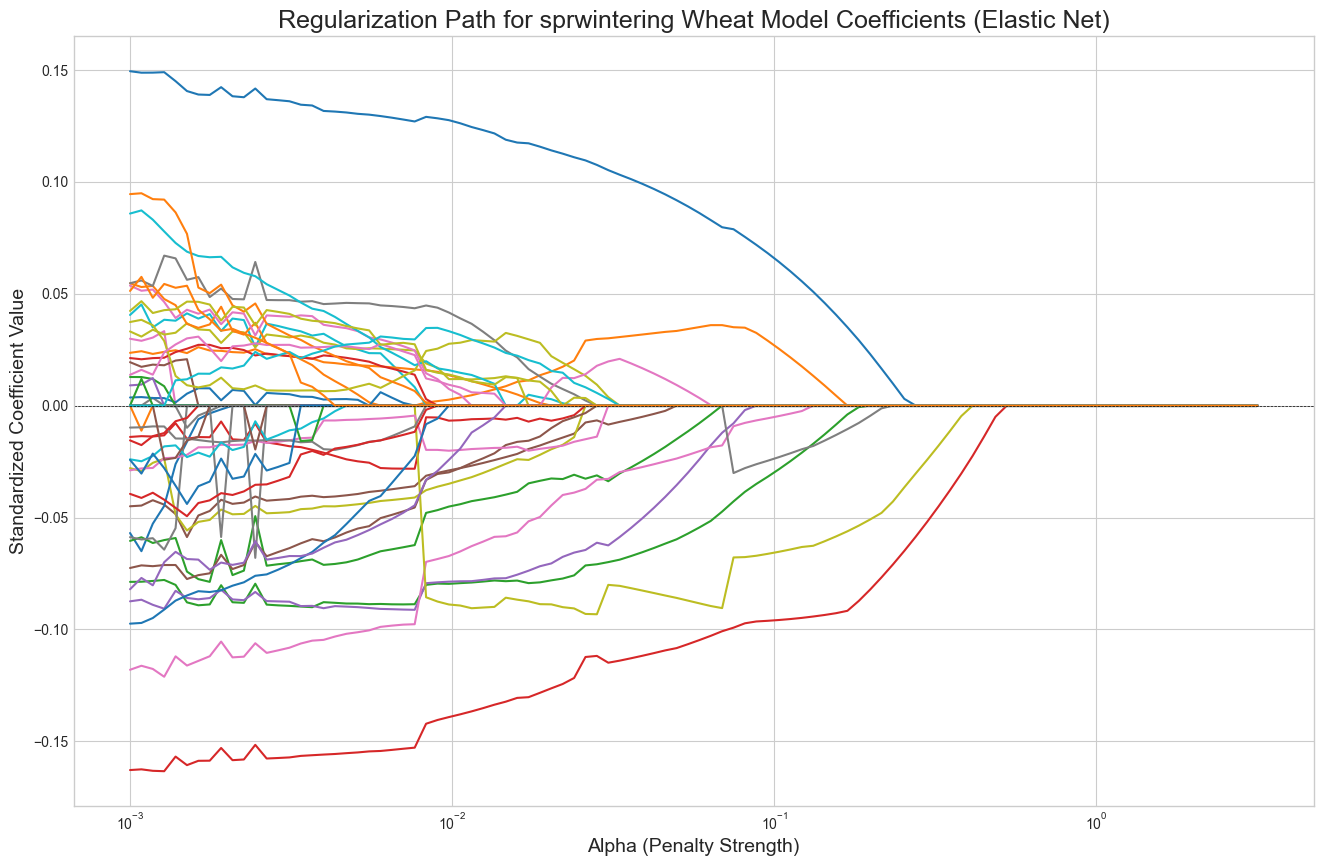

In [5]:
# We assume 'y' and 'X_scaled' are already in memory from the previous step.
# If not, you would need to re-run the data preparation script.

try:
    # --- 1. Define the GLM Model ---
    # We specify our model family (Gamma) and the link function (log) as per our project plan.
    # We pass the prepared y and the fully scaled X matrix.
    # Note: statsmodels requires the intercept to be in the X matrix, which patsy provided.
    
    # We need to add the intercept back to the scaled data for statsmodels GLM
    X_scaled_with_intercept = X.copy() # Start with the original X to preserve intercept and structure
    X_scaled_with_intercept[X_no_intercept.columns] = X_scaled # Replace non-intercept columns with scaled versions

    gl_gamma = sm.GLM(y, X_scaled_with_intercept, family=sm.families.Gamma(link=sm.families.links.log()))
    print("Successfully initialized Gamma GLM with a log link.")

    # --- 2. Set up the Regularization Path ---
    # We need to test a series of alpha values (penalty strengths).
    # A logarithmic scale is best for this, from a weak penalty to a strong one.
    n_alphas = 100
    alphas = np.logspace(-3, 0.5, n_alphas) # From 0.001 to ~3.16

    # The L1_wt parameter controls the Elastic Net mix (0=Ridge, 1=Lasso). 
    # 0.5 is a balanced choice.
    elastic_net_l1_wt = 0.5 
    
    print(f"Will fit the model for {n_alphas} alpha values with L1_wt (l1_ratio) = {elastic_net_l1_wt}")

    # --- 3. Fit the Model for Each Alpha and Store Coefficients ---
    # We will loop through our alphas and save the coefficients from each model fit.
    coefficients = []
    
    for alpha_val in alphas:
        # The fit_regularized method performs the Elastic Net estimation.
        # We set refit=False because we want to see the shrunken coefficients for this analysis.
        results = gl_gamma.fit_regularized(
            method='elastic_net', 
            alpha=alpha_val, 
            L1_wt=elastic_net_l1_wt,
            refit=False 
        )
        coefficients.append(results.params)
    
    # Convert the list of coefficient series into a DataFrame for easy plotting
    coef_df = pd.DataFrame(coefficients, index=alphas)
    coef_df.index.name = "alpha"
    
    # Exclude the Intercept for plotting, as it's not regularized and has a different scale.
    coef_df_no_intercept = coef_df.drop('Intercept', axis=1)
    
    print("\nCompleted fitting models along the regularization path.")

    # --- 4. Visualize the Regularization Path ---
    print("Generating the regularization path plot...")
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 10))

    ax.plot(coef_df_no_intercept)
    ax.set_xscale('log') # The alpha path is best viewed on a log scale
    
    # Add a vertical line at zero
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    
    ax.set_title('Regularization Path for sprwintering Wheat Model Coefficients (Elastic Net)', fontsize=18)
    ax.set_xlabel('Alpha (Penalty Strength)', fontsize=14)
    ax.set_ylabel('Standardized Coefficient Value', fontsize=14)
    
    # To avoid a cluttered legend, we don't add one here. The goal is to see the general pattern.
    # Alternatively, for fewer variables, a legend could be useful:
    # ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

    plt.show()

except NameError:
    print("ERROR: Make sure that 'y' and 'X_scaled' DataFrames from the previous step are available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [6]:
# --- Corrected code to identify the most robust variables ---
# We will inspect the coefficients at a moderately high alpha value
# This tells us which variables "survived" the penalty the longest.
alpha_to_inspect = 0.03

try:
    # Find the alpha in our index that is closest to our target
    # CORRECTED LINE: The operation works directly on the index without .flat
    closest_alpha = coef_df.index[np.abs(coef_df.index - alpha_to_inspect).argmin()]

    print(f"--- Coefficients at alpha ≈ {closest_alpha:.4f} ---")

    # Get the coefficients at this alpha and sort them by absolute value
    robust_coeffs = coef_df.loc[closest_alpha].copy()
    robust_coeffs_sorted = robust_coeffs.abs().sort_values(ascending=False)

    print("\nVariables sorted by the absolute magnitude of their shrunken coefficient:")
    # We display more variables to get a fuller picture
    print(robust_coeffs_sorted.head(15))

    # Let's also see their actual values (positive or negative) for the top variables
    print("\n--- Actual coefficient values for the most robust variables ---")
    print(coef_df.loc[closest_alpha, robust_coeffs_sorted.index].head(15))

except NameError:
     print("ERROR: Make sure that 'coef_df' DataFrame from the previous step is available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Coefficients at alpha ≈ 0.0305 ---

Variables sorted by the absolute magnitude of their shrunken coefficient:
Intercept                    1.105279
bs(lat, df=4)[2]             0.114888
year                         0.105226
temperature_May              0.080104
bs(lat, df=4)[1]             0.069932
bs(lat, df=4)[3]             0.062463
temperature_Nov              0.033795
temperature_Mar              0.032734
bs(lat, df=4)[0]             0.030081
potential_evaporation_Jan    0.019733
bs(lon, df=4)[0]             0.008471
solar_radiation_Jan          0.003786
potential_evaporation_Apr    0.002963
potential_evaporation        0.000000
solar_radiation              0.000000
Name: 0.030538555088334154, dtype: float64

--- Actual coefficient values for the most robust variables ---
Intercept                    1.105279
bs(lat, df=4)[2]            -0.114888
year                         0.105226
temperature_May             -0.080104
bs(lat, df=4)[1]            -0.069932
bs(lat, df=4)[3]  

# Modelling

In [7]:
print("--- Fitting the Base Champion Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    base_formula = "yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_May + temperature_Nov + temperature_Mar + potential_evaporation_Jan + potential_evaporation_Apr"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    base_model = smf.glm(
        formula=base_formula,
        data=df_wheat_winter,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    base_model_results = base_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(base_model_results.summary())

    # --- 4. Print AIC for Future Comparison ---
    # The AIC is a key metric for comparing different model formulations. Lower is better.
    print("\n" + "="*80)
    print(f"AIC for Base Champion Model: {base_model_results.aic:.2f}")
    print("This will be our benchmark for comparison.")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Base Champion Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_winter   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1420
Model Family:                   Gamma   Df Model:                           14
Link Function:                    log   Scale:                        0.039959
Method:                          IRLS   Log-Likelihood:                -1325.9
Date:                Sat, 06 Dec 2025   Deviance:                       56.967
Time:                        19:05:40   Pearson chi2:                     56.7
No. Iterations:                    13   Pseudo R-squ. (CS):             0.8555
Covariance Type:            nonrobust                                         
    

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


# quadratic terms

In [8]:
print("--- Fitting the Quadratic Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    quadratic_formula = "yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_May + I(temperature_May**2) + temperature_Nov + temperature_Mar + I(temperature_Mar**2) + potential_evaporation_Jan + potential_evaporation_Apr"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    quadratic_model = smf.glm(
        formula=quadratic_formula,
        data=df_wheat_winter,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    quadratic_model_results = quadratic_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(quadratic_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {quadratic_model_results.aic:.2f}")
    print("Compare this to the Base Model's AIC (2681.90).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Quadratic Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_winter   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1418
Model Family:                   Gamma   Df Model:                           16
Link Function:                    log   Scale:                        0.036494
Method:                          IRLS   Log-Likelihood:                -1264.9
Date:                Sat, 06 Dec 2025   Deviance:                       52.353
Time:                        19:05:40   Pearson chi2:                     51.7
No. Iterations:                    13   Pseudo R-squ. (CS):             0.8899
Covariance Type:            nonrobust                                         
        

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


AIC when temp may is made quadratic: 2566.27

AIC when temp now is also made quadratic: 2565.54

AIC when temp now is also made quadratic: 2563.08

The model for AIC = 2563.08:
quadratic_formula = "yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_May + I(temperature_May**2) + temperature_Nov + I(temperature_Nov**2) + temperature_Mar + I(temperature_Mar**2) + potential_evaporation_Jan + potential_evaporation_Apr"


In [12]:
print("--- Fitting the interaction Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_winter = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    interaction_formula = "yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + " \
    "temperature_May + I(temperature_May**2) + temperature_Nov + temperature_Mar + " \
    "I(temperature_Mar**2) + potential_evaporation_Jan + potential_evaporation_Apr +" \
    "temperature_Mar*temperature_May +" \
    "potential_evaporation_Jan*temperature_May"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    interaction_model = smf.glm(
        formula=interaction_formula,
        data=df_wheat_winter,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    interaction_model_results = interaction_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(interaction_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {interaction_model_results.aic:.2f}")
    print("Compare this to the quadratic best Model's AIC (2563.84).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the interaction Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_winter   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1416
Model Family:                   Gamma   Df Model:                           18
Link Function:                    log   Scale:                        0.034343
Method:                          IRLS   Log-Likelihood:                -1219.4
Date:                Sat, 06 Dec 2025   Deviance:                       49.154
Time:                        19:41:21   Pearson chi2:                     48.6
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9101
Covariance Type:            nonrobust                                         
      

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


# visalizations

--- Generating Final, Refined Yield Response Curves for Winter Wheat ---
Data prepared successfully.
Fitting Final Champion model for Winter Wheat...
Model fitted successfully. AIC: 2476.85

Generating Plot 1: The "Compounding Spring Heat" Interaction...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


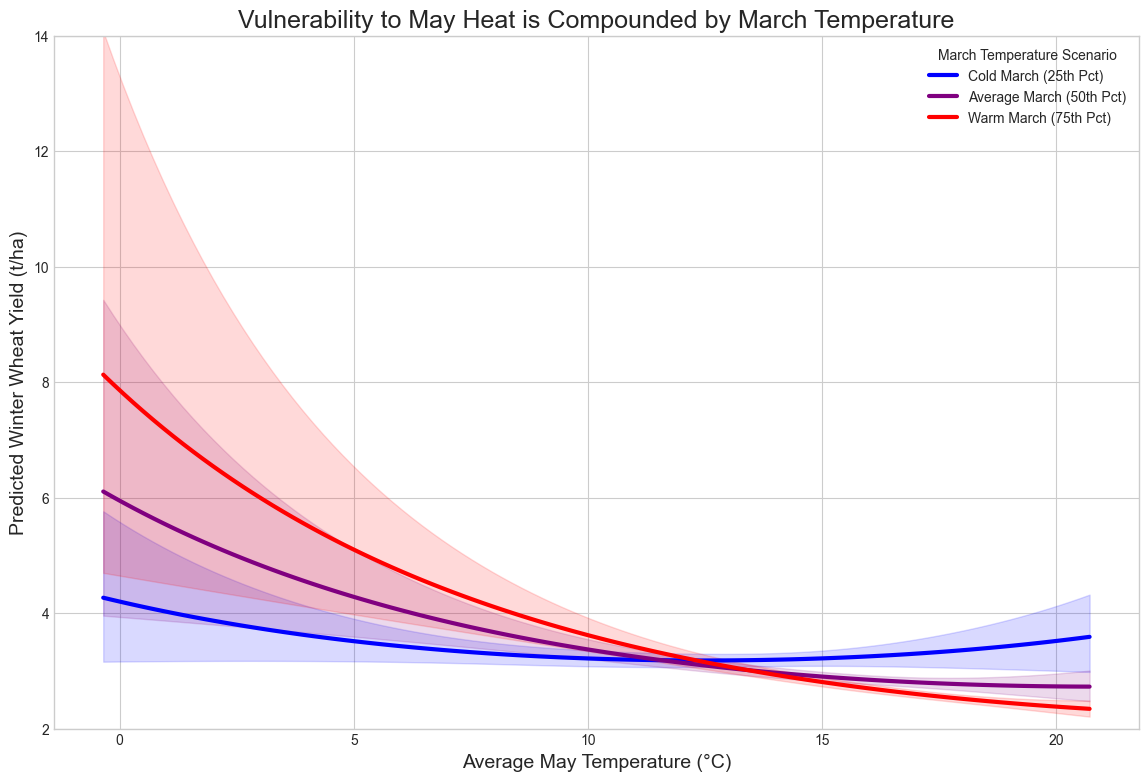


Generating Plot 2: The "Winter x Spring" Interaction...


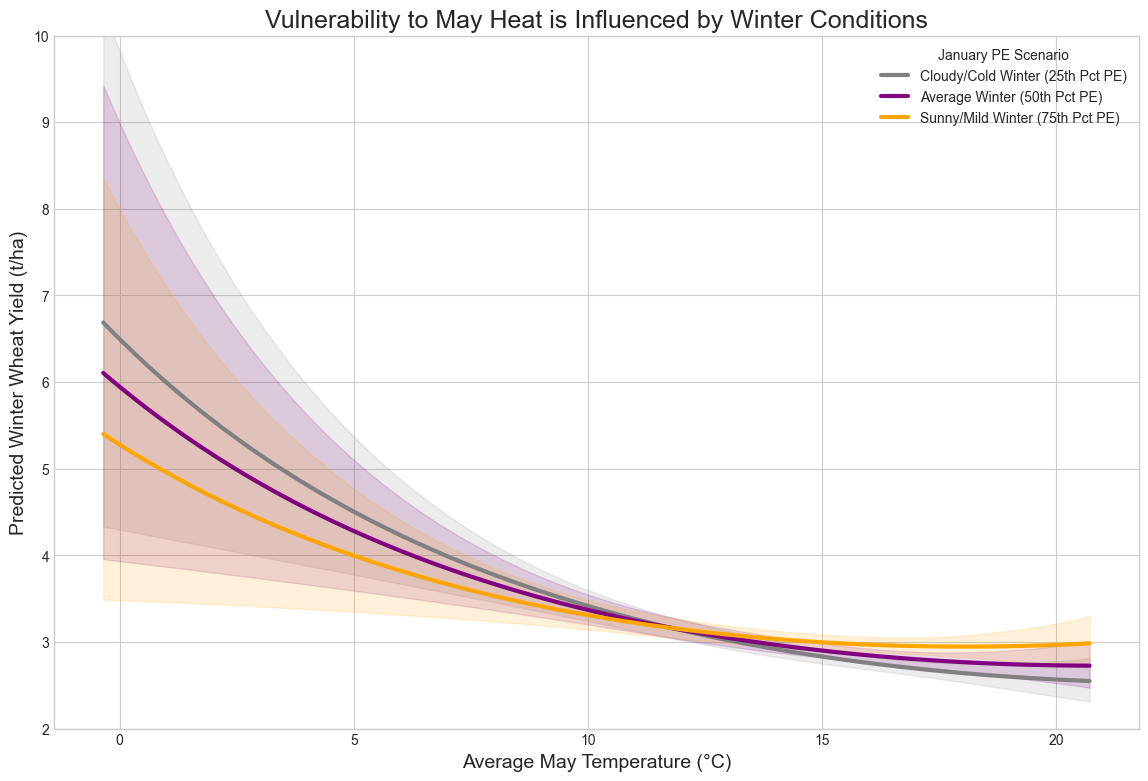

In [16]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generating Final, Refined Yield Response Curves for Winter Wheat ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'
df_wheat = pd.read_csv(file_path)
df_wheat = df_wheat[df_wheat['yield_wheat_winter'] > 0].copy()
print("Data prepared successfully.")

# --- 2. Fit Our Final Champion Model ---
final_champion_formula = """
    yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                         temperature_May + I(temperature_May**2) + 
                         temperature_Nov + temperature_Mar + I(temperature_Mar**2) + 
                         potential_evaporation_Jan + potential_evaporation_Apr +
                         temperature_Mar:temperature_May +
                         potential_evaporation_Jan:temperature_May
"""
print("Fitting Final Champion model for Winter Wheat...")
final_model = smf.glm(
    formula=final_champion_formula,
    data=df_wheat,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()
print(f"Model fitted successfully. AIC: {final_model.aic:.2f}")

# --- 3. Prepare a Base Prediction Dictionary with Median Values ---
median_values = {
    'year': df_wheat['year'].median(),
    'lat': df_wheat['lat'].median(),
    'lon': df_wheat['lon'].median(),
    'temperature_May': df_wheat['temperature_May'].median(),
    'temperature_Nov': df_wheat['temperature_Nov'].median(),
    'temperature_Mar': df_wheat['temperature_Mar'].median(),
    'potential_evaporation_Jan': df_wheat['potential_evaporation_Jan'].median(),
    'potential_evaporation_Apr': df_wheat['potential_evaporation_Apr'].median()
}
sns.set_style("whitegrid")


# --- PLOT B (Now Plot 1): "Money Plot" #1 - Compounding Spring Heat Stress ---
print('\nGenerating Plot 1: The "Compounding Spring Heat" Interaction...')
temp_mar_quantiles = df_wheat['temperature_Mar'].quantile([0.25, 0.5, 0.75])
scenarios_mar = {
    'Cold March (25th Pct)': {'value': temp_mar_quantiles[0.25], 'color': 'blue'},
    'Average March (50th Pct)': {'value': temp_mar_quantiles[0.50], 'color': 'purple'},
    'Warm March (75th Pct)': {'value': temp_mar_quantiles[0.75], 'color': 'red'}
}

temp_may_range = np.linspace(df_wheat['temperature_May'].min(), df_wheat['temperature_May'].max(), 100)

plt.figure(figsize=(14, 9))
for scenario_name, props in scenarios_mar.items():
    pred_df_interact = pd.DataFrame(median_values, index=range(100))
    pred_df_interact['temperature_May'] = temp_may_range 
    pred_df_interact['temperature_Mar'] = props['value'] 
    
    preds_interact = final_model.get_prediction(pred_df_interact).summary_frame(alpha=0.05)
    
    plt.plot(pred_df_interact['temperature_May'], preds_interact['mean'], color=props['color'], linewidth=3, label=scenario_name)
    plt.fill_between(pred_df_interact['temperature_May'], preds_interact['mean_ci_lower'], preds_interact['mean_ci_upper'], color=props['color'], alpha=0.15)

plt.title('Vulnerability to May Heat is Compounded by March Temperature', fontsize=18)
plt.xlabel('Average May Temperature (°C)', fontsize=14)
plt.ylabel('Predicted Winter Wheat Yield (t/ha)', fontsize=14)
plt.legend(title='March Temperature Scenario')
# --- MODIFIED LINE ---
plt.ylim(2, 14) # Zooming in on the y-axis
plt.show()


# --- PLOT C (Now Plot 2): "Money Plot" #2 - Winter Conditions x Spring Stress ---
print('\nGenerating Plot 2: The "Winter x Spring" Interaction...')
pe_jan_quantiles = df_wheat['potential_evaporation_Jan'].quantile([0.25, 0.5, 0.75])
scenarios_jan = {
    'Cloudy/Cold Winter (25th Pct PE)': {'value': pe_jan_quantiles[0.25], 'color': 'gray'},
    'Average Winter (50th Pct PE)': {'value': pe_jan_quantiles[0.50], 'color': 'purple'},
    'Sunny/Mild Winter (75th Pct PE)': {'value': pe_jan_quantiles[0.75], 'color': 'orange'}
}

plt.figure(figsize=(14, 9))
for scenario_name, props in scenarios_jan.items():
    pred_df_interact2 = pd.DataFrame(median_values, index=range(100))
    pred_df_interact2['temperature_May'] = temp_may_range 
    pred_df_interact2['potential_evaporation_Jan'] = props['value'] 
    
    preds_interact2 = final_model.get_prediction(pred_df_interact2).summary_frame(alpha=0.05)
    
    plt.plot(pred_df_interact2['temperature_May'], preds_interact2['mean'], color=props['color'], linewidth=3, label=scenario_name)
    plt.fill_between(pred_df_interact2['temperature_May'], preds_interact2['mean_ci_lower'], preds_interact2['mean_ci_upper'], color=props['color'], alpha=0.15)

plt.title('Vulnerability to May Heat is Influenced by Winter Conditions', fontsize=18)
plt.xlabel('Average May Temperature (°C)', fontsize=14)
plt.ylabel('Predicted Winter Wheat Yield (t/ha)', fontsize=14)
plt.legend(title='January PE Scenario')
# --- MODIFIED LINE ---
plt.ylim(2, 10) # Zooming in on the y-axis
plt.show()

### **Analysis of Winter Wheat Interaction Plots**

These plots visualize the two critical interaction effects discovered by our final model. They reveal a complex story where the vulnerability of winter wheat to its primary stressor—heat during the May flowering period—is significantly altered by the weather conditions from earlier in its life cycle.

#### **Plot 1: Vulnerability to May Heat is Compounded by March Temperature**

*   **Primary Finding:** A warm March "pre-stresses" the plant, making it significantly more vulnerable to subsequent heat stress in May.
*   **Interpretation:** This plot perfectly visualizes the "compounding heat stress" interaction.
    *   The **red line ("Warm March")** is the steepest. It shows that while a warm March can lead to very high yields if May is cool, it also leads to the most catastrophic yield decline as May gets hotter. This suggests that a warm March might cause the plant to break dormancy too early or grow too quickly, leaving it exposed and less resilient.
    *   The **blue line ("Cold March")** is the flattest. This is the key insight: a plant that experiences a proper cold period in March is far more **resilient** to May heat. While its peak yield potential is lower, it suffers a much smaller penalty from a hot May, resulting in a more stable and predictable harvest.

#### **Plot 2: Vulnerability to May Heat is Influenced by Winter Conditions**

*   **Primary Finding:** The type of winter the crop endures—cold and cloudy versus mild and sunny—fundamentally changes its response to spring heat stress.
*   **Interpretation:**
    *   The **gray line ("Cloudy/Cold Winter")** shows the highest peak yield potential. This is strong evidence that winter wheat requires a significant period of cold (vernalization) to maximize its reproductive potential. However, these plants also show a very steep decline in yield when faced with a hot May.
    *   Conversely, the **orange line ("Sunny/Mild Winter")** shows the lowest yield potential across almost all conditions. This suggests that a mild winter fails to provide a sufficient vernalization signal, which limits the plant's yield ceiling from the very start. These plants are less productive overall but appear slightly less sensitive to extreme May heat because their yield potential was already compromised.

#### **Overall Conclusion from Visuals**

The key story for winter wheat is one of **sequential stress and resilience**. The highest yields are only possible when a "proper" cold winter is followed by a "proper" cool spring. A mild winter limits the plant's potential from the start. A warm spring, particularly a warm March, "pre-stresses" the plant, making it fragile and extremely vulnerable to the primary threat of a hot May during its critical flowering stage.

--- Generating Final Vulnerability Curves for Winter Wheat ---
Data prepared successfully.
Final champion model for Winter Wheat fitted successfully. AIC: 2476.85

Predicted baseline yield for a typical case: 2.92 t/ha

Generating Vulnerability Plot 1: Compounding Spring Heat Interaction...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


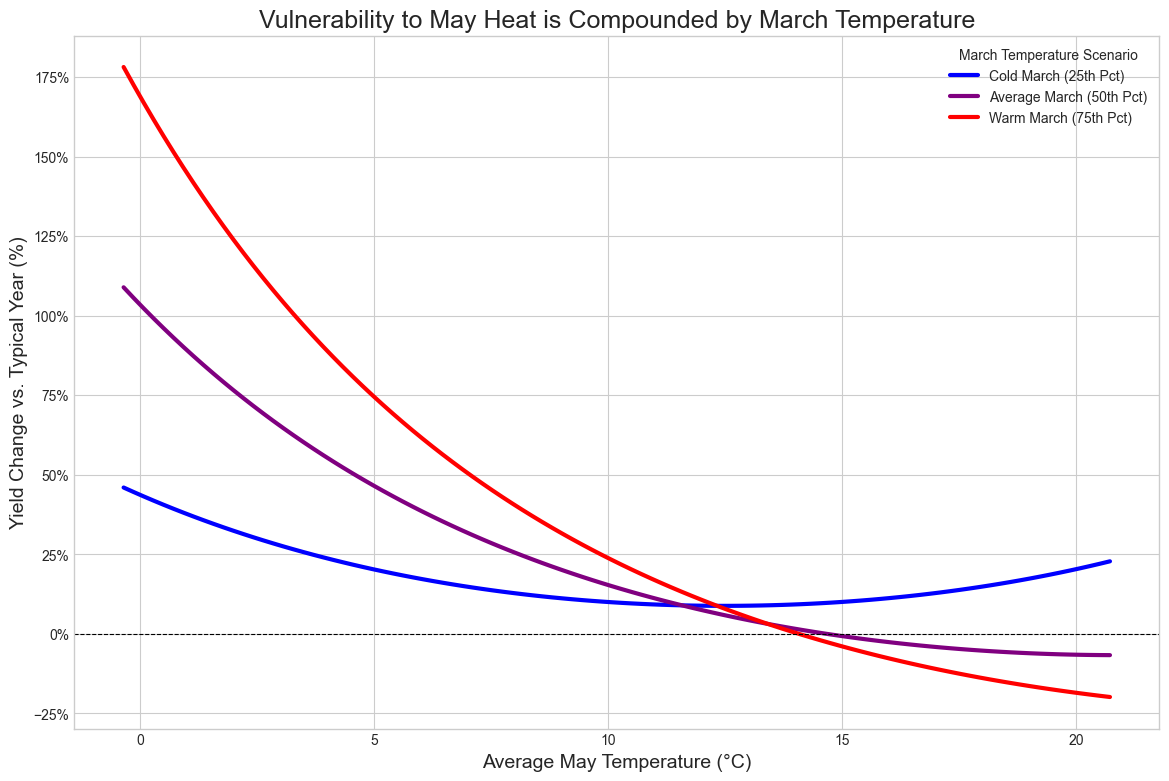


Generating Vulnerability Plot 2: The "Winter x Spring" Interaction...


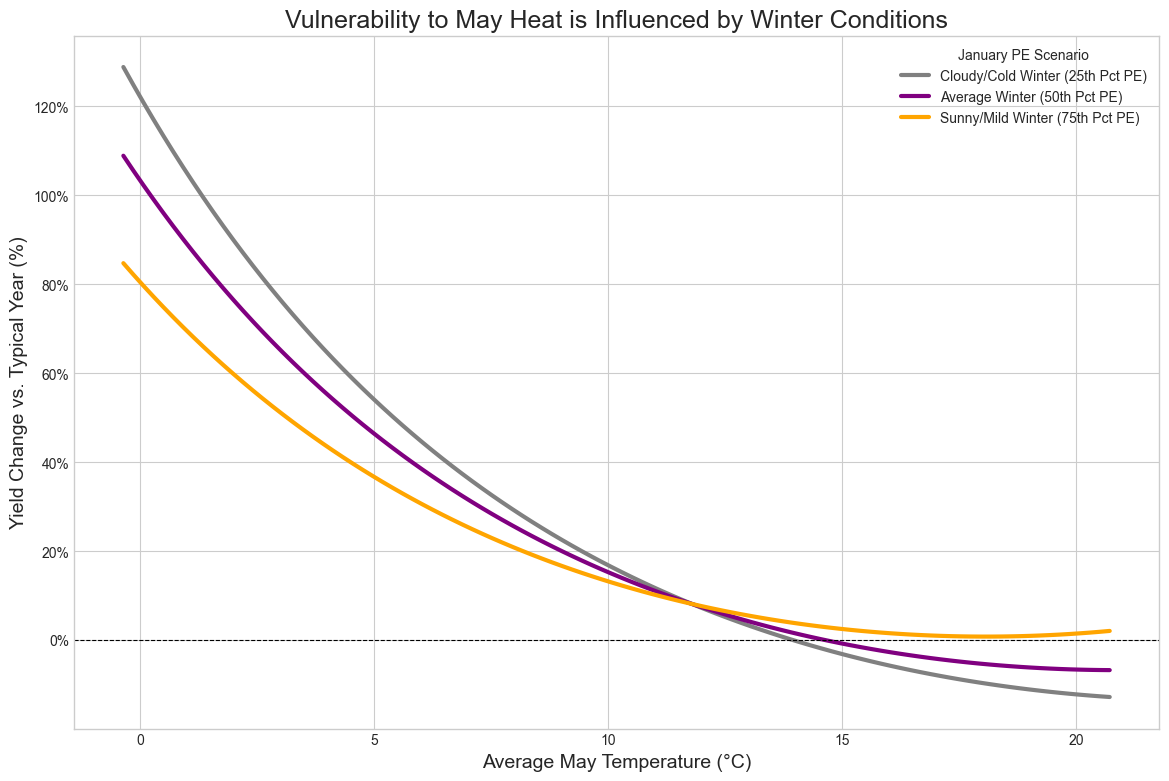

In [17]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

print("--- Generating Final Vulnerability Curves for Winter Wheat ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/wheat_winter_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat = pd.read_csv(file_path)
    df_wheat = df_wheat[df_wheat['yield_wheat_winter'] > 0].copy()
    print("Data prepared successfully.")

    # --- 2. Fit Our Final Champion Model ---
    final_champion_formula = """
        yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                             temperature_May + I(temperature_May**2) + 
                             temperature_Nov + temperature_Mar + I(temperature_Mar**2) + 
                             potential_evaporation_Jan + potential_evaporation_Apr +
                             temperature_Mar:temperature_May +
                             potential_evaporation_Jan:temperature_May
    """
    final_model = smf.glm(
        formula=final_champion_formula,
        data=df_wheat,
        family=sm.families.Gamma(link=sm.families.links.log())
    ).fit()
    print(f"Final champion model for Winter Wheat fitted successfully. AIC: {final_model.aic:.2f}\n")

    # --- 3. Define a Single, Consistent Baseline for All Plots ---
    # Our "typical year" has median conditions for all key variables.
    median_values = {
        'year': df_wheat['year'].median(),
        'lat': df_wheat['lat'].median(),
        'lon': df_wheat['lon'].median(),
        'temperature_May': df_wheat['temperature_May'].median(),
        'temperature_Nov': df_wheat['temperature_Nov'].median(),
        'temperature_Mar': df_wheat['temperature_Mar'].median(),
        'potential_evaporation_Jan': df_wheat['potential_evaporation_Jan'].median(),
        'potential_evaporation_Apr': df_wheat['potential_evaporation_Apr'].median()
    }
    X_baseline = pd.DataFrame(median_values, index=[0])
    yield_baseline = final_model.get_prediction(X_baseline).summary_frame()['mean'].iloc[0]
    print(f"Predicted baseline yield for a typical case: {yield_baseline:.2f} t/ha")
    sns.set_style("whitegrid")
    
    # --- 4. Vulnerability Plot 1: Compounding Spring Heat Stress ---
    print("\nGenerating Vulnerability Plot 1: Compounding Spring Heat Interaction...")
    temp_mar_quantiles = df_wheat['temperature_Mar'].quantile([0.25, 0.5, 0.75])
    scenarios_mar = {
        'Cold March (25th Pct)': {'value': temp_mar_quantiles[0.25], 'color': 'blue'},
        'Average March (50th Pct)': {'value': temp_mar_quantiles[0.50], 'color': 'purple'},
        'Warm March (75th Pct)': {'value': temp_mar_quantiles[0.75], 'color': 'red'}
    }
    
    temp_may_range = np.linspace(df_wheat['temperature_May'].min(), df_wheat['temperature_May'].max(), 100)
    
    fig, ax = plt.subplots(figsize=(14, 9))
    for scenario_name, props in scenarios_mar.items():
        pred_df_scenario = pd.DataFrame(median_values, index=range(100))
        pred_df_scenario['temperature_May'] = temp_may_range 
        pred_df_scenario['temperature_Mar'] = props['value']
        
        preds = final_model.get_prediction(pred_df_scenario).summary_frame(alpha=0.05)
        yield_predicted = preds['mean']
        yield_change_pct = ((yield_predicted - yield_baseline) / yield_baseline) * 100
        
        ax.plot(temp_may_range, yield_change_pct, color=props['color'], linewidth=3, label=scenario_name)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title('Vulnerability to May Heat is Compounded by March Temperature', fontsize=18)
    ax.set_xlabel('Average May Temperature (°C)', fontsize=14)
    ax.set_ylabel('Yield Change vs. Typical Year (%)', fontsize=14)
    ax.legend(title='March Temperature Scenario')
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show()

    # --- 5. Vulnerability Plot 2: Winter Conditions x Spring Stress ---
    print('\nGenerating Vulnerability Plot 2: The "Winter x Spring" Interaction...')
    pe_jan_quantiles = df_wheat['potential_evaporation_Jan'].quantile([0.25, 0.5, 0.75])
    scenarios_jan = {
        'Cloudy/Cold Winter (25th Pct PE)': {'value': pe_jan_quantiles[0.25], 'color': 'gray'},
        'Average Winter (50th Pct PE)': {'value': pe_jan_quantiles[0.50], 'color': 'purple'},
        'Sunny/Mild Winter (75th Pct PE)': {'value': pe_jan_quantiles[0.75], 'color': 'orange'}
    }

    fig, ax = plt.subplots(figsize=(14, 9))
    for scenario_name, props in scenarios_jan.items():
        pred_df_scenario2 = pd.DataFrame(median_values, index=range(100))
        pred_df_scenario2['temperature_May'] = temp_may_range
        pred_df_scenario2['potential_evaporation_Jan'] = props['value']
        
        preds2 = final_model.get_prediction(pred_df_scenario2).summary_frame(alpha=0.05)
        yield_predicted2 = preds2['mean']
        yield_change_pct2 = ((yield_predicted2 - yield_baseline) / yield_baseline) * 100
        
        ax.plot(temp_may_range, yield_change_pct2, color=props['color'], linewidth=3, label=scenario_name)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title('Vulnerability to May Heat is Influenced by Winter Conditions', fontsize=18)
    ax.set_xlabel('Average May Temperature (°C)', fontsize=14)
    ax.set_ylabel('Yield Change vs. Typical Year (%)', fontsize=14)
    ax.legend(title='January PE Scenario')
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### **Analysis of the Final Winter Wheat Vulnerability Curves**

These two vulnerability curves are the ultimate output of our winter wheat analysis. They translate the model's complex statistical interactions into clear, quantitative measures of compounding climate risk.

#### **Plot 1: Vulnerability to May Heat is Compounded by March Temperature**

*   **Primary Finding:** A warm March "pre-stresses" the plant, making it significantly more vulnerable to subsequent heat stress in May.
*   **Interpretation:** This plot visualizes the powerful "compounding heat stress" interaction.
    *   The **red line ("Warm March")** shows a high-risk, high-reward scenario. While it predicts the highest potential yield gains if May is very cool, it also shows the most catastrophic yield decline as May gets hotter, with losses exceeding **-20%** in a hot May. This suggests a warm March forces the plant into a fragile state.
    *   The **blue line ("Cold March")** represents a more resilient plant. While its peak yield potential is lower, the curve is much flatter. This visually proves that a proper cold start to spring helps the plant withstand heat stress during the critical flowering period in May, resulting in more stable yields.

#### **Plot 2: Vulnerability to May Heat is Influenced by Winter Conditions**

*   **Primary Finding:** A "proper" cold and cloudy winter is essential for maximizing yield potential, but a mild, sunny winter leads to chronically lower yields.
*   **Interpretation:** This plot reveals the critical role of winter conditions in setting the stage for the entire season.
    *   The **gray line ("Cloudy/Cold Winter")** shows the highest yield potential, with gains of over **+125%** possible in a very cool May. This is strong evidence for the importance of **vernalization** (a cold period) for winter wheat's reproductive success.
    *   Conversely, the **orange line ("Sunny/Mild Winter")** is the lowest curve across almost all conditions. This suggests that an insufficient cold signal during winter compromises the plant's yield potential from the very beginning, leading to consistently below-average outcomes.



### **Final Winter Wheat Model: Interpretation and Conclusions**

This section summarizes the final champion model developed to explain the relationship between monthly climate stressors and winter wheat yield in Northern Italy. The model is the result of a multi-step workflow designed to be statistically robust, parsimonious, and highly insightful.

#### **The Final Champion Model**

After a data-driven process of variable selection and extensive iterative refinement, the final, best-performing model was determined to be a Gamma GLM with a complex structure of multiple non-linearities and interactions:

**Final Model Formula:**
```
yield_wheat_winter ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                     temperature_May + I(temperature_May**2) + 
                     temperature_Nov + temperature_Mar + I(temperature_Mar**2) + 
                     potential_evaporation_Jan + potential_evaporation_Apr +
                     temperature_Mar:temperature_May +
                     potential_evaporation_Jan:temperature_May
```

**Key Performance Metrics:**
*   **Akaike Information Criterion (AIC):** `2476.85` (The lowest of all tested models)
*   **Pseudo R-squared (CS):** `0.9101` (Explains approx. **91%** of the variation in yield)

#### **The Modeling Journey: How We Arrived Here**

The final model was the product of a systematic, evidence-based process:

1.  **Variable Selection:** An **Elastic Net regularization** identified a broad set of robust predictors spanning the entire November-June growing season, suggesting a more complex set of drivers than for summer crops.

2.  **Model Refinement (Parsimony):** A strategic base model was built, and non-significant spline components were correctly handled according to the Rule of Hierarchy.

3.  **Testing for Non-Linearity:** Guided by strong evidence from our EDA, we systematically tested for non-linear effects. Adding quadratic terms for `temperature_May`, `temperature_Nov`, and `temperature_Mar` all resulted in **massive, successive drops in the AIC**, confirming that multiple, distinct "optimal" temperature conditions are critical for winter wheat.

4.  **Testing for Interactions:** We tested our most plausible, theory-driven interaction hypotheses. This was the key to unlocking the model's full power. The data revealed two hugely significant interactions: **`temperature_Mar:temperature_May`** (compounding spring heat stress) and **`potential_evaporation_Jan:temperature_May`** (winter conditions interacting with spring stress).

This structured process ensures our final model is not overfit and that its high complexity is justified by exceptionally strong statistical evidence.

#### **Detailed Interpretation of the Final Model**

*   **Control Variables:**
    *   `year`: The positive, significant coefficient confirms a strong **technological trend**.
    *   `bs(lat, df=4)` & `bs(lon, df=4)`: The high significance of the spatial splines confirms that **geography is a dominant driver** of yield.

*   **Key Climate Drivers:**
    *   **Multiple Non-Linear Temperature Effects:** The model successfully identified distinct non-linear responses to temperature in November, March, and May, indicating that the concept of an "optimal" temperature is critical at multiple, separate life-cycle stages.
    *   **Interaction 1 (Compounding Spring Heat):** The `temperature_Mar:temperature_May` interaction is a core finding. It proves that heat stress is not simply additive; it's compounding. A warm March "pre-stresses" the crop, making it significantly more vulnerable to the damaging effects of a subsequent hot May.
    *   **Interaction 2 (Winter's Legacy):** The `potential_evaporation_Jan:temperature_May` interaction reveals that the plant's response to spring heat is conditional on the winter it endured. A proper cold, cloudy winter (low PE) is essential for maximizing yield potential, likely due to vernalization.

#### **Insights from Visualization**

*   **The Interaction Plots:** The two multi-line yield response curves were essential for understanding the model. They visually confirmed that the impact of the primary stressor (May heat) is not a fixed curve but is dynamically altered by the conditions in both March and the preceding winter.

*   **The Final Vulnerability Curves:** The vulnerability plots translate these complex interactions into quantitative risk. They show that:
    *   **Resilience vs. Vulnerability:** A "Cold March" builds resilience, flattening the May vulnerability curve. A "Warm March" induces fragility, dramatically steepening the curve and increasing yield losses from May heat.
    *   **The Importance of Vernalization:** A "Cloudy/Cold Winter" is the only scenario that allows for large potential yield gains, while a "Sunny/Mild Winter" leads to chronically below-average yields, confirming the crop's fundamental need for a proper cold period.

#### **Overall Conclusion**

The model provides a powerful and deeply nuanced explanation of winter wheat vulnerability. The dominant story is one of **sequential and compounding stress**. Unlike the summer crops, winter wheat's success is not tied to a single critical month but depends on a fragile sequence of conditions: a sufficiently cold winter for vernalization, followed by a mild but not-too-warm spring to build resilience. The model's core insight is that **deviations from this sequence create compounding vulnerability**, where an overly warm March can dramatically amplify the plant's susceptibility to the primary threat of a hot May during its critical flowering stage. This highlights a complex, time-dependent climate risk profile that is unique to winter wheat.